In [1]:
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = './dog_bark.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

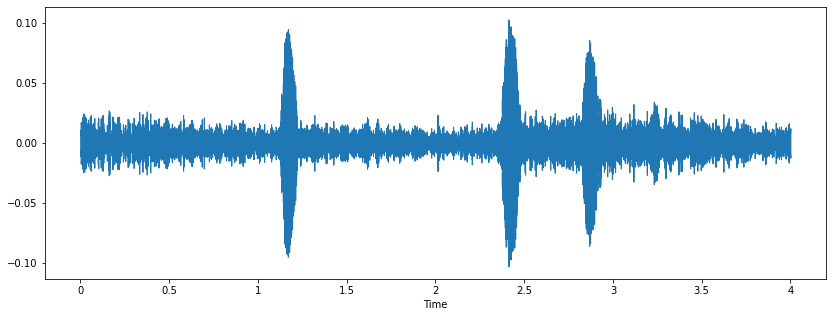

In [5]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
data

array([ 0.00680424,  0.01001977,  0.00837677, ..., -0.00625793,
       -0.00586295, -0.0068677 ], dtype=float32)

In [8]:
import pandas as pd
metadata = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
## Check wheter the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [10]:
# Audio classification data preprocessing
audio_file_path = './UrbanSound8K/audio/fold1/7061-6-0-0.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [11]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


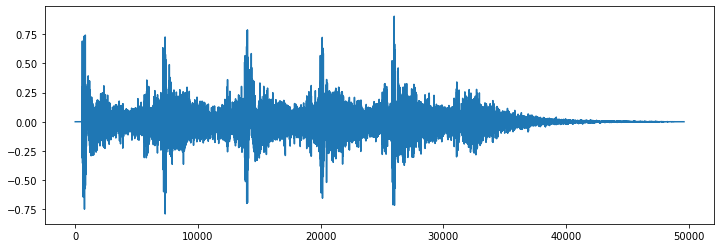

In [12]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [13]:
## Librosa always converts the signal to one channel, will always be mono
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [15]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

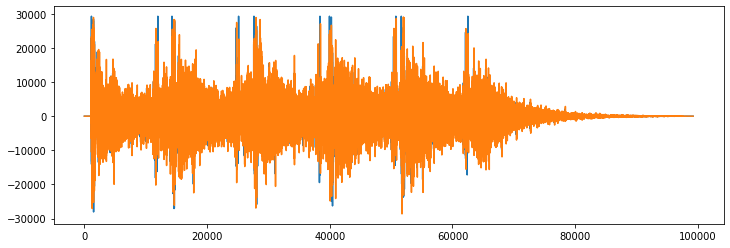

In [16]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [17]:
## Extract Features
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [18]:
mfccs

array([[-1.2778429e+02,  7.4964676e+00,  1.5476106e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065771e+02],
       [ 3.0827904e+01,  2.3719746e+01,  1.1416364e+01, ...,
         4.3051193e+01,  2.5888039e+01,  1.2829863e+01],
       [-3.3416877e+00, -1.2030355e+01, -1.5005076e+01, ...,
        -1.1103720e+01, -7.5506306e+00,  2.0151034e-01],
       ...,
       [ 6.1909240e-01, -3.2603273e+00, -4.7559180e+00, ...,
         2.4095767e+00,  3.1699710e+00, -2.1265170e-01],
       [-1.0057060e+01, -9.3599148e+00, -6.4467363e+00, ...,
        -5.0200999e-02,  7.2894961e-01, -9.0058041e-01],
       [ 1.9151611e+00,  2.0736117e+00,  3.0683603e+00, ...,
        -2.0609179e+00, -2.2312689e+00, -1.7745539e+00]], dtype=float32)

In [19]:
## Extracting MFCC'S for every audio file

audio_dataset_path = './UrbanSound8K/audio'
metadata = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [21]:
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:08, 15.23it/s]/Users/ivanrodriguez/Library/Python/3.8/lib/python/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [11:03, 12.71it/s]/Users/ivanrodriguez/Library/Python/3.8/lib/python/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/ivanrodriguez/Library/Python/3.8/lib/python/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [11:44, 12.39it/s]


In [23]:
### converting extracted_features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [24]:
## Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(8732, 40)

In [26]:
### Label encoding
y = np.array(pd.get_dummies(y))

In [27]:
### Train Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape

(6985, 40)

In [29]:
X_test.shape

(1747, 40)

In [30]:
y_train.shape

(6985, 10)

In [31]:
y_test.shape

(1747, 10)

In [44]:
X_test

array([[-2.6864090e+02,  1.0516959e+02,  1.6310549e+01, ...,
        -1.5550406e+00, -6.6717380e-01, -3.0795305e+00],
       [-4.6647327e+02,  1.5016655e+00, -3.4400040e+01, ...,
         1.7706207e+01,  1.3831075e+01, -5.1632876e+00],
       [-9.4321190e+01,  4.5096165e+01, -4.3605549e+01, ...,
         4.3434143e+00, -7.7579916e-01, -1.7241189e+00],
       ...,
       [-1.2965582e+02,  1.4068562e+02, -3.5013344e+01, ...,
        -9.2866459e+00,  4.6785512e+00,  1.2090994e+01],
       [-2.0651558e+02,  9.9582108e+01, -3.1021313e+01, ...,
        -2.1591036e-01,  9.5544893e-01,  7.0967859e-01],
       [-2.8766943e+02,  1.5093176e+02,  6.2241521e+00, ...,
        -2.6231223e-01, -2.1278443e+00, -1.5802814e+00]], dtype=float32)

In [45]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [32]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Model Creation


In [33]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [35]:
num_labels = y.shape[1]

In [36]:
model = Sequential()
### first layer
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [38]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [39]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 [============================>.] - ETA: 0s - loss: 10.4811 - accuracy: 0.1226
Epoch 1: val_loss improved from inf to 2.28475, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 4ms/step - loss: 10.4350 - accuracy: 0.1223 - val_loss: 2.2848 - val_accuracy: 0.1397
Epoch 2/100
208/219 [===========================>..] - ETA: 0s - loss: 2.5481 - accuracy: 0.1378
Epoch 2: val_loss improved from 2.28475 to 2.27525, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5363 - accuracy: 0.1396 - val_loss: 2.2753 - val_accuracy: 0.1374
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 2.3081 - accuracy: 0.1599
Epoch 3: val_loss improved from 2.27525 to 2.22371, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3077 - accuracy: 0.1583 - val_loss: 2.2237 - val_accuracy: 0.17

In [40]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
test_accuracy

[0.7626516222953796, 0.7498568892478943]

In [41]:
### Testing the model
prediction_feature=features_extractor('./UrbanSound8K/audio/fold1/98223-7-4-0.wav')
prediction_feature=prediction_feature.reshape(1,-1)
predict_x=model.predict(prediction_feature)
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([9])

# Examples
## Dog Bark
7383-3-1-0
7383-3-0-1
7383-3-0-0

## Street Music
73277-9-0-24
73277-9-0-19
73277-9-0-17

# Drilling
71087-4-1-0
71087-4-0-0
7061-6-0-0

# Air conditioner
59277-0-0-7
59277-0-0-6
59277-0-0-5

# Gun shot
46656-6-2-0
46656-6-4-0

# Siren
40722-8-0-4
40722-8-0-3
40722-8-0-2

In [42]:
### testing the model
test_filename = './UrbanSound8K/audio/fold1/59277-0-0-7.wav'
audio, sample_rate = librosa.load(test_filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
# print(mfccs_scaled_features)

# using juts one item
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)

predicted_label = model.predict(mfccs_scaled_features)
predicted_classes = np.argmax(predicted_label, axis=1)
predicted_classes

array([0])

In [43]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(metadata['class']))

prediction_class = labelencoder.inverse_transform(predicted_classes)
prediction_class

array(['air_conditioner'], dtype=object)